<a href="https://colab.research.google.com/github/soda1102/AI_26/blob/main/03_02_k%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80%EC%9D%98%ED%95%9C%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 농어 무게를 예측하는 k-최근접알고리즘을 사용해서 회귀 모델을 사용해본 결과
#  정확한 예측이 어려울 수 있다라는 결론이 생겼다. (원본데이터의 갯수 부족)
# 길이가 50cm인 농어가 들어왔을 때의 회귀는? 이라는 한계점이 생긴다.

In [ ]:
import numpy as np

# numpy를 이용해 배열을 생성

# 농어 56개 데이터
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# 사이킷런을 이용해 훈련세트와 테스트세트를 나눈다.

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 2차원 배열로 만들어야 한다.
# -1 지정하면 원소 갯수로 모두 채우라는 의미, 1은 두번째 크기를 1로(특성)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
# 회귀 알고리즘용 구현 클래스
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

# 사이킷런의 k-최근접이웃 기본값이 5인데, 이것을 3으로 변경
# 이웃의 갯수를 3으로 설정
print(knr.predict([[50]]))
# 농어 50cm의 무게를 예측한 결과 1,033g

[1033.33333333]


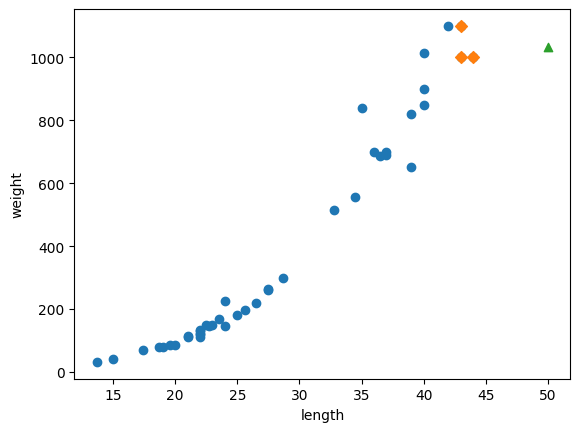

In [ ]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그리자
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 결론 : 50이상의 길이 데이터가 없고 무게도 없다.(아래쪽의 평균이 나온다.)

In [ ]:
# 45cm 근방으로 평균값이 나온다.
print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
# 100cm 로 결과 확인
print(knr.predict([[100]]))

[1033.33333333]


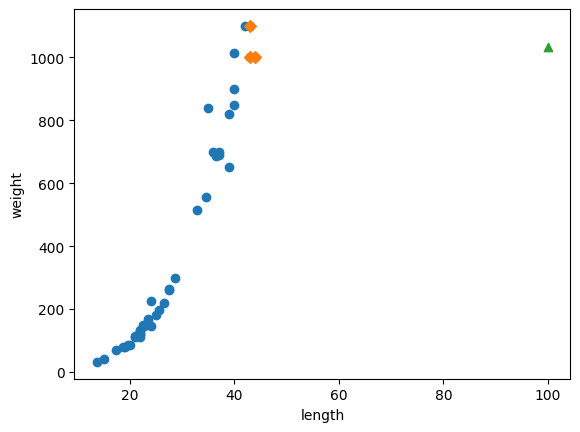

In [ ]:
# 결론 : 기본데이터 부족으로 한계가 생겼다.

# 100cm 농어의 이웃을 구하자
dictances, indexes = knr.kneighbors([[100]])

# 훈련세트의 산점도를 그리자
plt.scatter(train_input, train_target)

# 훈련세트 중에서 이웃 샘플만 다시 그리자
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# k-최근접 이웃 알고리즘은 가볍고 사용하기 쉬운 대신 한계가 있다.

In [ ]:
# k-최근접 이웃 알고리즘의 한계에 대한 → 선형회귀

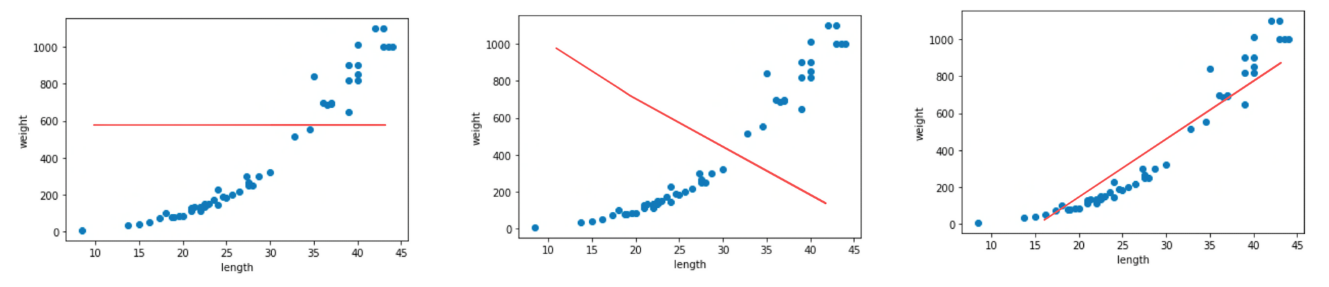

In [ ]:
# 선형회귀(linear : 리니어) 비교적 간단하고 성능이 뛰어나다.
# 선형이라는 말에서 짐작할 수 있듯이 직선을 학습하는 알고리즘
# 빨간선이 가로로 되어있으면 농어의 무게를 한개로 인식한다.
# 빨간선이 위에서 시작해서 아래로 떨어지면 반대로 예측한다.
# 빨간선이 아래에서 시작해서 위로 올라가면 정상적인 차트로 구현한다.

# 사이킷런에서 제공하는 클래스를 사용해보자
from sklearn.linear_model import LinearRegression

# LinearRegression : 선형 회귀용

# 선형 회귀용 객체를 생성하여 변수에 연결
lr = LinearRegression()

# 선형 회귀용으로 훈련 시작
lr.fit(train_input, train_target)

LinearRegression()

In [ ]:
print(lr.predict([[50]]))
# 농어의 무게 기울기 + 절편 (y(농어의 무게) = a * x(농어의 길이) + b)
# 직선의 방정식, 무게(1241.83g)로 예측

[1241.83860323]


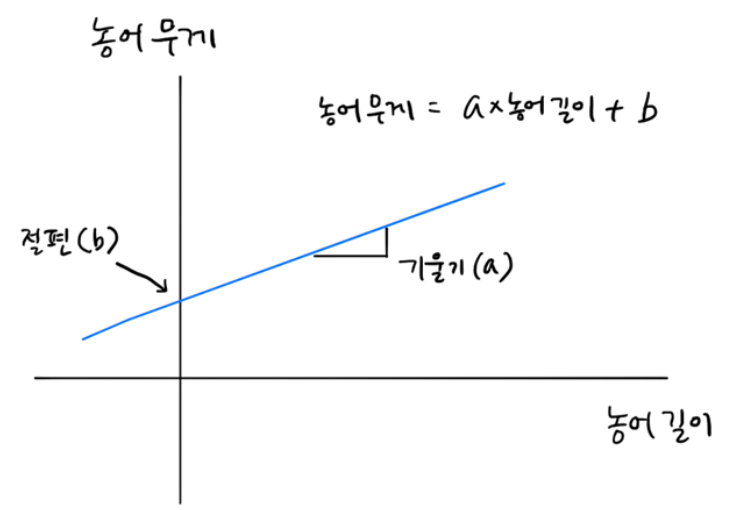

In [ ]:
# lr.coef_ 계수, lr.intercept_ 인터셉트
print(lr.coef_, lr.intercept_)
# 기울기를 종종 계수(coefficent), 가중치(weight) 라고도 부른다.

[39.01714496] -709.0186449535477


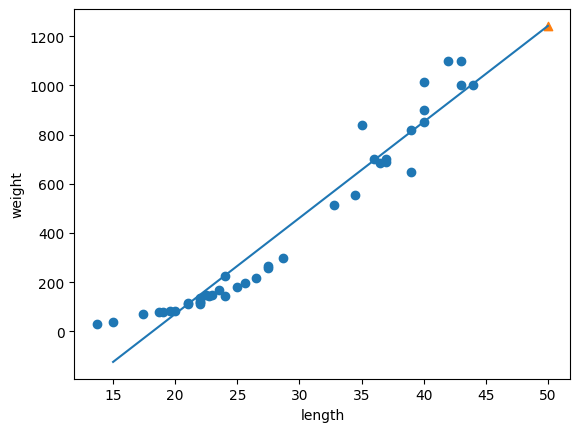

In [ ]:
# 그래프로 확인해보자

# 훈련세트의 산점도를 그리자
plt.scatter(train_input, train_target)

# 15 ~ 50 까지의 1차 방정식 그래프를 그리자
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
# [15, 50] : 직선차트 x축 값 / [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_] : y축값[15*계수+인터셉트, 50*계수+인터셉트]
# 농어의 무게공식 = 기울기 * 농어의 길이 + 절편

# 50cm 농어 데이터
plt.scatter(50, 1241.9, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 결론 : 예측은 가능하나 직선이라 값이 너무 직선적.

print(lr.score(train_input, train_target))  # 93.98%
print(lr.score(test_input, test_target))  # 82.47%
# 훈련세트가 테스트에 비해 높지만 차이가 많이 나므로 과소적합이라고 한다.(5% 내외가 좋다.)

0.939846333997604
0.8247503123313558


In [ ]:
# 다항회귀(Polynomial Regression) 제곱을 활용하여 직선을 곡선으로 처리 가능

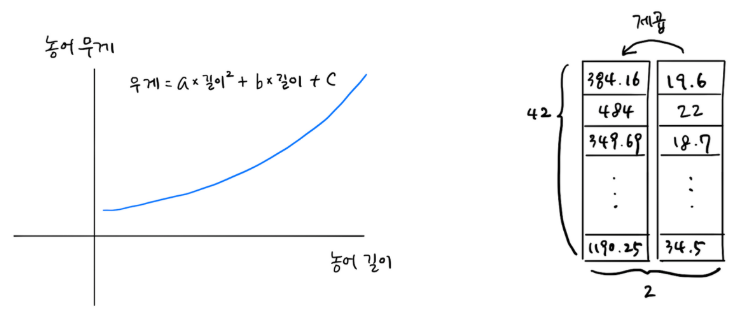

In [ ]:
# 다항회귀는 2차원 방정식의 그래프로 그리려면 길이를 제곱한 항이 훈련세트에 추가되어야 한다.

# 선형회귀의 문제점은 왼쪽 하단에 있는 기준점이 불일치가 되므로 곡선으로 만들어줘야 한다.
train_poly = np.column_stack((train_input ** 2, train_input))

#제곱한 것과 두 배열을 나란히 붙여준다.
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)
# 2개의 특성이 만들어진다. (제곱값, 원본값)

(42, 2) (14, 2)


In [ ]:
print(train_poly)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [ ]:
# 선형회귀 객체 생성
lr = LinearRegression()

# 훈련 시작
lr.fit(train_poly, train_target)

# 결과 테스트
print(lr.predict([[50 ** 2, 50]]))
# 테스트할 때 이 모델의 농어 길이의 제곱과 원래 길이를 함께 넣었다.
# 결과 : 50cm의 무게는 1573.98g으로 나온다.
# 직선형에서는 50cm의 무게가 1241.83g으로 나온다.

[1573.98423528]


In [ ]:
# 농어의 무게 기울기 + 절편
# (y(농어의 무게) = a * x(농어의 길이) + b)

# lr.coef_ : 계수, lr.intercept_ : 인터셉트
print(lr.coef_, lr.intercept_)
# 1573.98 = 1.01        *   50**2       - 21.55 * 50 + 116.05
# 무게 =  lr.coef_[0] * 농어의길이 ** 2 - lr.coef_[1] + lr.intercept_

[  1.01433211 -21.55792498] 116.0502107827827


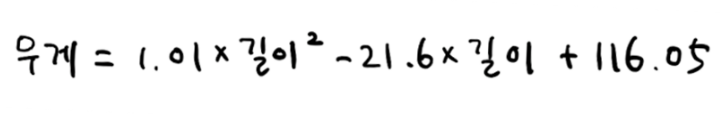

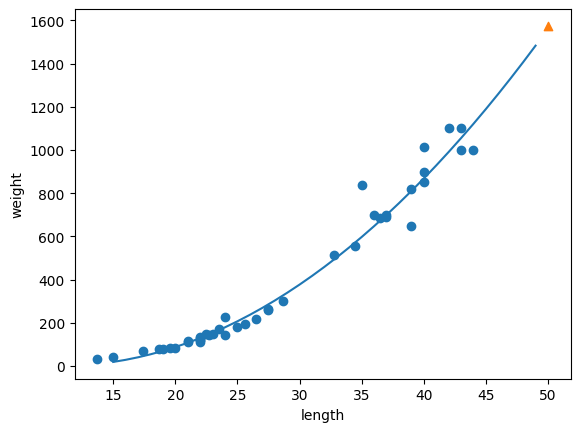

In [ ]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다.
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그려보자.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그려보자
plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.05)  # 다행회귀 공식 적용

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 문제 해결을 위해 선형회귀와 다항회귀를 통해 문제를 해결하려고 했다.
# 하지만 아직 모델에 과소적합이 남아있다.
# 이를 해결하기 위해 조금 더 복잡한 모델을 만들어야 할 것 같다.
# 또 복잡한 모델을 만들다가 너무 복잡해진 경우 모델의 복잡도를 억제하는 방법도 알아봐야 할 것 같다.

0.9706807451768623
0.9775935108325122
